<a href="https://colab.research.google.com/github/JoaoAnjos-DataScience/JoaoAnjos-DataScience/blob/main/Estudo_de_Grafos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

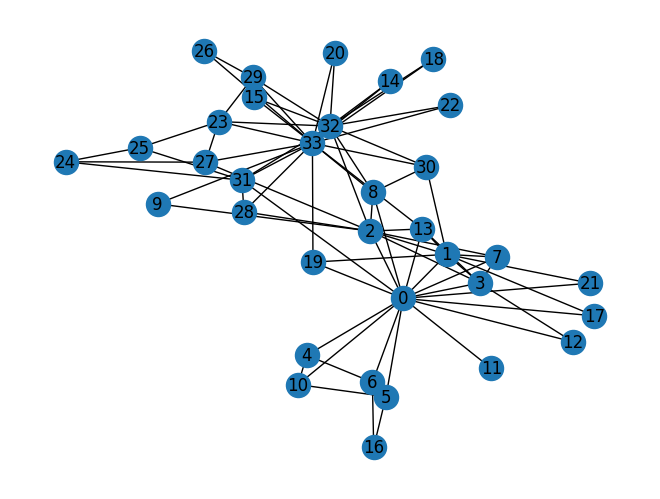

In [2]:
# carregar o grafo Club Karate já existente na biblioteca network
G = nx.karate_club_graph()

# visualizar o grafo
nx.draw(G, with_labels = True)

In [3]:
# número de nós e de arestas
len(G.nodes), len(G.edges)

(34, 78)

In [4]:
def edge_to_remove(graph):
  G_dict = nx.edge_betweenness_centrality(graph)
  edge = ()

  # extrai o nó com maior score EBC
  for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
      edge = key
      break

  return edge

In [5]:
#agora vamos utilizar a função acima para encontrar as comunidades - subgrafos
def girvan_newman(graph):
	# procura número de conexões
	sg = nx.connected_components(graph)
	sg_count = nx.number_connected_components(graph)

	while(sg_count == 1):
		graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
		sg = nx.connected_components(graph)
		sg_count = nx.number_connected_components(graph)

	return sg

In [6]:
# vamos encontrar as comunidades no grafo
c = girvan_newman(G.copy())

# as comunidades são formadas por quais nós
node_groups = []

for i in c:
  node_groups.append(list(i))

In [7]:
node_groups

[[0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21],
 [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]]

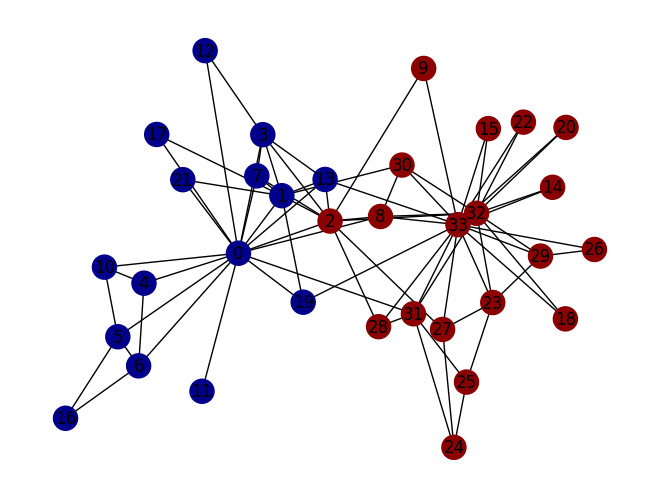

In [11]:
# visualizar graficamente as comunidades
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('darkblue')
    else:
        color_map.append('darkred')

nx.draw(G, node_color=color_map, with_labels=True)
plt.show()